In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
from tensorflow import keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('../GeneratedData/reducedData.csv')

# Define features and target
cols_numeric =['energy', 'key', 'valence', 'tempo_x', 'time_signature', 'chroma_stft_mean', 'chroma_stft_var', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'harmony_mean', 'perceptr_mean', 'tempo_y', 'mfcc1_variance', 'mfcc3_mean', 'mfcc3_variance', 'mfcc4_mean', 'mfcc4_variance', 'mfcc5_mean', 'mfcc6_mean', 'mfcc7_mean', 'mfcc8_mean', 'mfcc9_mean', 'mfcc10_mean', 'mfcc11_mean', 'mfcc12_mean', 'mfcc13_mean', 'mfcc14_mean', 'mfcc15_mean', 'mfcc16_mean', 'mfcc17_mean', 'mfcc18_mean', 'mfcc19_mean', 'mfcc20_mean']
output_column = 'genre'

X = data[cols_numeric]
y = data[output_column]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0823 - loss: 2.7298 - val_accuracy: 0.1167 - val_loss: 2.6691
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1073 - loss: 2.6554 - val_accuracy: 0.1875 - val_loss: 2.5751
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1687 - loss: 2.5207 - val_accuracy: 0.2167 - val_loss: 2.4783
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2059 - loss: 2.4625 - val_accuracy: 0.2208 - val_loss: 2.4423
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2112 - loss: 2.3893 - val_accuracy: 0.2208 - val_loss: 2.4099
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2563 - loss: 2.2882 - val_accuracy: 0.2125 - val_loss: 2.4090
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2795 - loss: 2.2403 - val_accuracy: 0.2625 - val_loss: 2.3780
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2673 - loss: 2.2029 - val_accuracy: 0.2542 - val_loss:

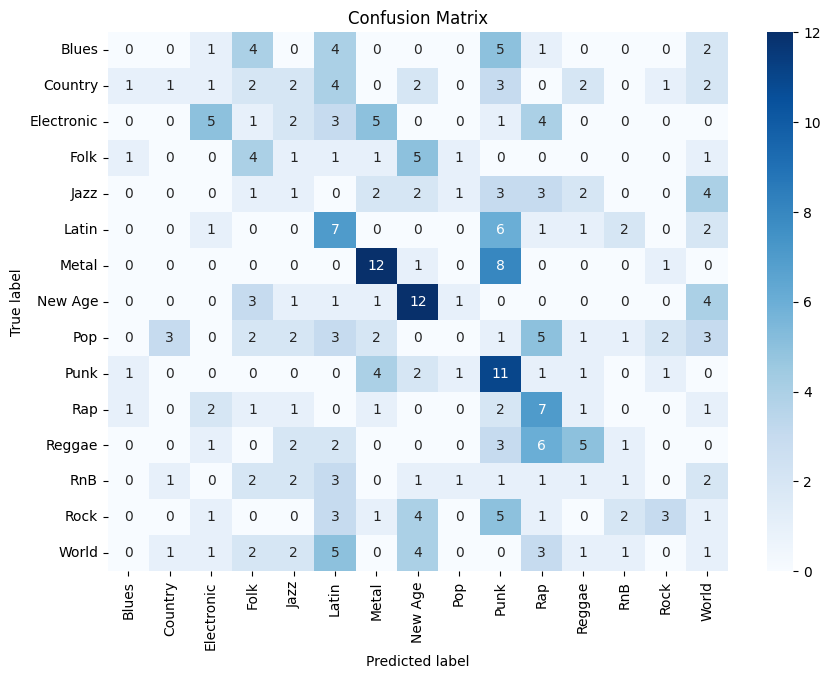

ROC AUC Score: 0.72


In [2]:

# Split the dataset
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Create and compile the model
model_nn = keras.Sequential([
    keras.layers.Dense(128, input_shape=(X_train_nn.shape[1],), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(len(label_encoder.classes_), activation='softmax')  # Output layer for classification
])

model_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_nn.fit(X_train_nn, y_train_nn, epochs=25, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model_nn.evaluate(X_test_nn, y_test_nn)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions
predictions = model_nn.predict(X_test_nn)
predicted_classes = predictions.argmax(axis=1)

# Inverse transform predicted genres
predicted_genres = label_encoder.inverse_transform(predicted_classes)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_nn, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC AUC score for multi-class
# Use the one-hot encoding for multi-class ROC AUC
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test_nn, classes=np.arange(len(label_encoder.classes_)))
roc_auc = roc_auc_score(y_test_binarized, predictions, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.2f}")


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:59:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.26
Confusion Matrix:
[[ 5  0  1  0  2  2  1  0  2  2  0  3  2  2  0]
 [ 5  4  0  2  2  3  0  1  0  0  2  2  1  3  2]
 [ 3  1  5  0  0  1  2  1  2  2  0  3  0  2  2]
 [ 2  5  1  1  3  1  2  3  0  0  0  0  0  0  1]
 [ 3  5  2  3  4  0  2  2  1  1  2  1  0  2  1]
 [ 2  1  0  1  1  3  1  0  5  1  2  1  0  2  2]
 [ 0  0  0  0  0  0 19  1  0  2  0  0  1  4  0]
 [ 4  1  1  1  0  0  0 17  0  1  0  1  0  0  3]
 [ 2  3  0  2  0  1  2  0  9  0  2  0  1  5  2]
 [ 1  1  1  0  1  1  3  1  3  8  0  3  0  4  0]
 [ 0  0  2  2  1  1  0  0  0  5  9  0  1  0  0]
 [ 1  1  2  0  0  1  1  0  0  2  3  6  2  2  1]
 [ 3  2  2  0  0  2  0  0  3  1  1  2  2  3  4]
 [ 1  2  1  1  0  2  5  4  2  2  0  3  0  4  0]
 [ 4  2  0  2  1  3  0  3  3  0  1  1  2  2  1]]


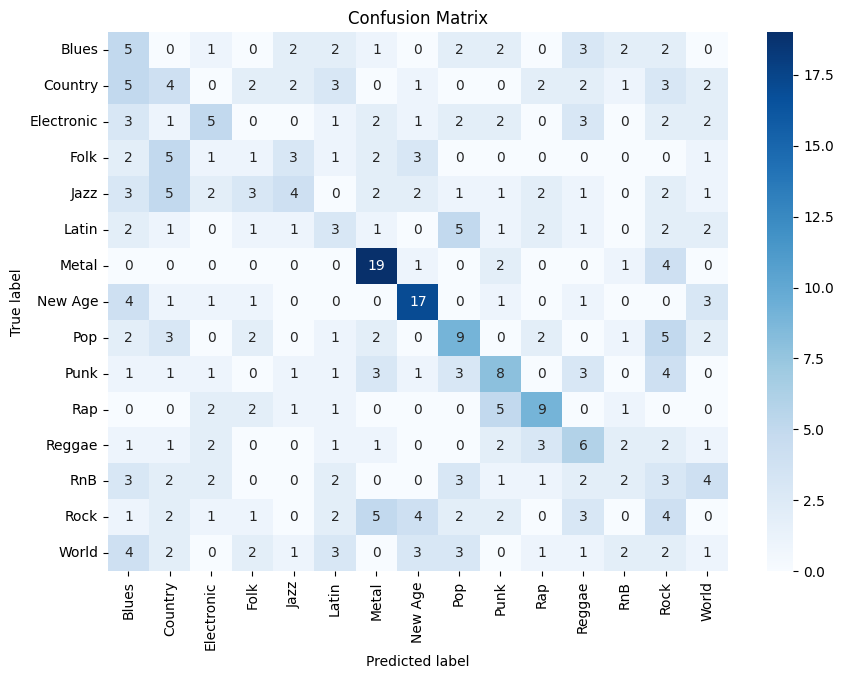

ROC AUC Score: 0.72


In [4]:
# XGBOOST

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Split the dataset
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_scaled, y_encoded, test_size=0.25, random_state=42)

# Initialize the XGBoost classifier
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=10000, learning_rate=0.001)

# Fit the model
model_xgb.fit(X_train_xgb, y_train_xgb)

# Evaluate the model
y_pred = model_xgb.predict(X_test_xgb)
test_accuracy = accuracy_score(y_test_xgb, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_xgb, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC AUC score for multi-class
# Use the one-hot encoding for multi-class ROC AUC
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test_xgb, classes=np.arange(len(label_encoder.classes_)))
y_pred_proba = model_xgb.predict_proba(X_test_xgb)

roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.2f}")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Set up the model
XGB_cv = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=10000, learning_rate=0.0005)

# Perform cross-validation
cv_scores = cross_val_score(XGB_cv, X_scaled, y_encoded, cv=5, scoring='accuracy')  # You can change 'cv' for number of folds

# Print the results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f} +- {cv_scores.std():.2f}")


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:01:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:04:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:07:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:10:43] WAR

Cross-Validation Scores: [0.26       0.26       0.29333333 0.27666667 0.27      ]
Mean Accuracy: 0.27 ± 0.01


Epoch 1/25


c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0721 - loss: 2.7373 - val_accuracy: 0.1292 - val_loss: 2.6577
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1302 - loss: 2.6311 - val_accuracy: 0.1875 - val_loss: 2.5418
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1912 - loss: 2.5137 - val_accuracy: 0.2417 - val_loss: 2.4175
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2141 - loss: 2.3765 - val_accuracy: 0.2583 - val_loss: 2.3680
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2574 - loss: 2.2581 - val_accuracy: 0.2667 - val_loss: 2.3697
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2694 - loss: 2.2192 - val_accuracy: 0.2792 - val_loss: 2.3246
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2992 - loss: 2.1497 - val_accuracy: 0.2917 - val_loss: 2.3340
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3093 - loss: 2.0670 - val_accuracy: 0.2833 - val_loss: 2.3284
Epo

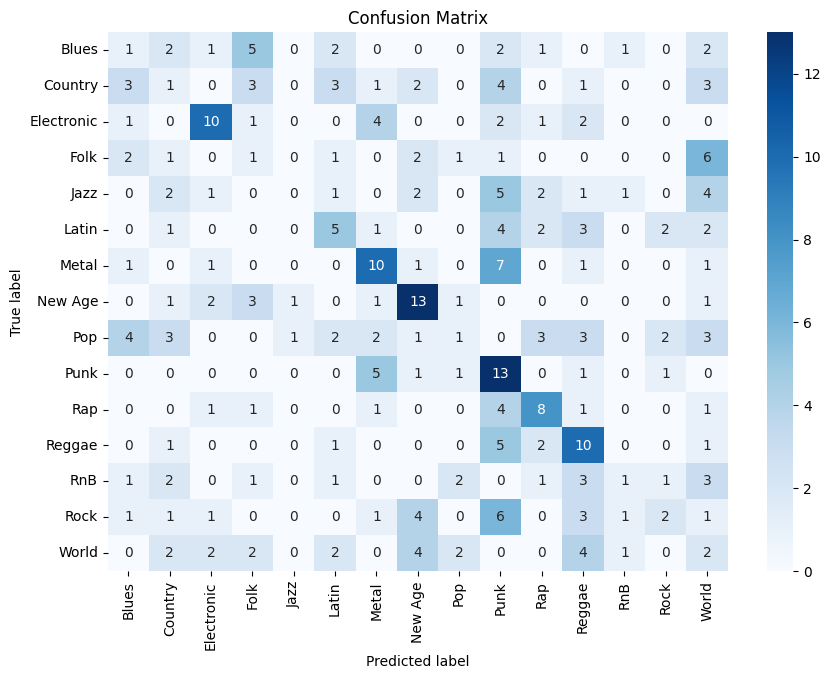

ROC AUC Score: 0.72


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
from tensorflow import keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('../GeneratedData/reducedData_with_energy_key.csv')

# Define features and target
cols_numeric =['key', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo_x', 'time_signature', 'chroma_stft_mean', 'chroma_stft_var', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'harmony_mean', 'perceptr_mean', 'tempo_y', 'mfcc1_variance', 'mfcc3_mean', 'mfcc3_variance', 'mfcc4_mean', 'mfcc4_variance', 'mfcc5_mean', 'mfcc6_mean', 'mfcc7_mean', 'mfcc8_mean', 'mfcc9_mean', 'mfcc10_mean', 'mfcc11_mean', 'mfcc12_mean', 'mfcc13_mean', 'mfcc14_mean', 'mfcc15_mean', 'mfcc16_mean', 'mfcc17_mean', 'mfcc18_mean', 'mfcc19_mean', 'mfcc20_mean']
output_column = 'genre'

X = data[cols_numeric]
y = data[output_column]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Create and compile the model
model_nn = keras.Sequential([
    keras.layers.Dense(128, input_shape=(X_train_nn.shape[1],), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(len(label_encoder.classes_), activation='softmax')  # Output layer for classification
])

model_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_nn.fit(X_train_nn, y_train_nn, epochs=25, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model_nn.evaluate(X_test_nn, y_test_nn)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions
predictions = model_nn.predict(X_test_nn)
predicted_classes = predictions.argmax(axis=1)

# Inverse transform predicted genres
predicted_genres = label_encoder.inverse_transform(predicted_classes)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_nn, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC AUC score for multi-class
# Use the one-hot encoding for multi-class ROC AUC
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test_nn, classes=np.arange(len(label_encoder.classes_)))
roc_auc = roc_auc_score(y_test_binarized, predictions, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.2f}")


Epoch 1/25


c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0855 - loss: 2.7244 - val_accuracy: 0.1375 - val_loss: 2.6445
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1565 - loss: 2.5967 - val_accuracy: 0.1792 - val_loss: 2.5354
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2048 - loss: 2.5132 - val_accuracy: 0.2125 - val_loss: 2.4133
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2031 - loss: 2.4327 - val_accuracy: 0.2333 - val_loss: 2.3452
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2496 - loss: 2.3222 - val_accuracy: 0.2458 - val_loss: 2.3023
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2938 - loss: 2.2350 - val_accuracy: 0.2583 - val_loss: 2.2842
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2843 - loss: 2.1955 - val_accuracy: 0.2583 - val_loss: 2.2979
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3133 - loss: 2.1442 - val_accuracy: 0.2708 - val_loss: 2.2821
Epo

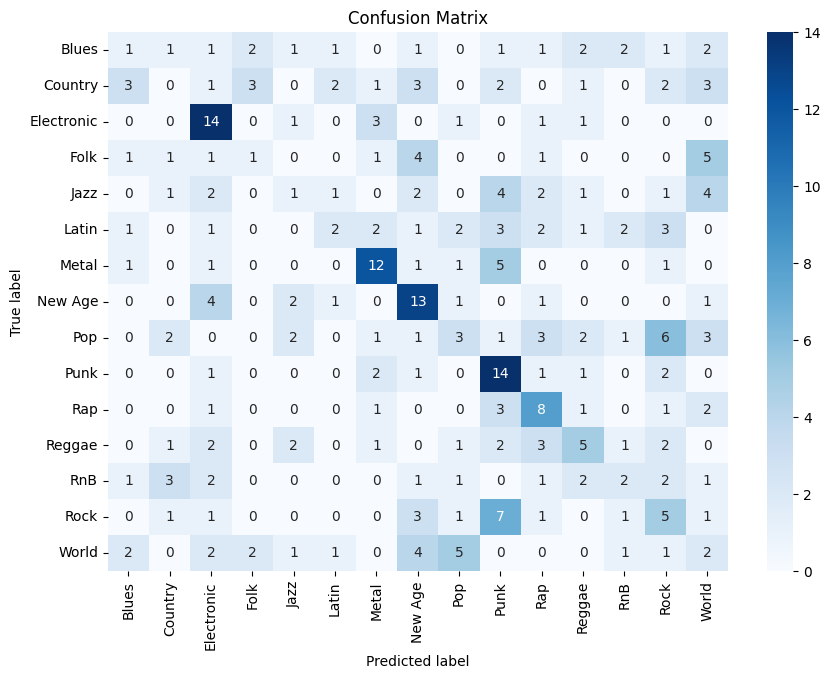

ROC AUC Score: 0.73


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
from tensorflow import keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('../GeneratedData/reducedData_with_energy_key.csv')

# Define features and target
cols_numeric = ['key', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 
                'tempo_x', 'time_signature', 'chroma_stft_mean', 'chroma_stft_var', 'rms_var', 
                'spectral_centroid_mean', 'spectral_centroid_var', 'harmony_mean', 'perceptr_mean', 
                'tempo_y', 'mfcc1_variance', 'mfcc3_mean', 'mfcc3_variance', 'mfcc4_mean', 'mfcc4_variance', 
                'mfcc5_mean', 'mfcc6_mean', 'mfcc7_mean', 'mfcc 8_mean', 'mfcc9_mean', 'mfcc10_mean', 
                'mfcc11_mean', 'mfcc12_mean', 'mfcc13_mean', 'mfcc14_mean', 'mfcc15_mean', 'mfcc16_mean', 
                'mfcc17_mean', 'mfcc18_mean', 'mfcc19_mean', 'mfcc20_mean'
                ]
output_column = 'genre'

# Select features and encode target
X = data[cols_numeric]
y = data[output_column]
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Combine X_scaled and y_encoded into a DataFrame for easier indexing after splitting
data_scaled = pd.DataFrame(X_scaled, columns=cols_numeric)
data_scaled['genre_encoded'] = y_encoded
data_scaled['tags'] = data['tags']  # Include tags for later use

# Split the data, keeping indices
train_df, test_df = train_test_split(data_scaled, test_size=0.2, random_state=42)

# Separate features and labels in train and test sets
X_train_nn = train_df[cols_numeric].values
y_train_nn = train_df['genre_encoded'].values
X_test_nn = test_df[cols_numeric].values
y_test_nn = test_df['genre_encoded'].values

# Create and compile the model
model_nn = keras.Sequential([
    keras.layers.Dense(128, input_shape=(X_train_nn.shape[1],), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model_nn.fit(X_train_nn, y_train_nn, epochs=25, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model_nn.evaluate(X_test_nn, y_test_nn)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions
predictions = model_nn.predict(X_test_nn)
predicted_classes = predictions.argmax(axis=1)

# Inverse transform predicted and true genres
predicted_genres = label_encoder.inverse_transform(predicted_classes)
true_genres = label_encoder.inverse_transform(y_test_nn)

# Calculate custom accuracy based on genre and tags column
correct_predictions = 0

# Loop over the test data and check if predicted genre matches genre or tags list
for idx, row in test_df.iterrows():
    # Get the index of the current row in the y_test_nn array
    true_genre = true_genres[test_df.index.get_loc(idx)].lower()  # Convert to lowercase
    predicted_genre = predicted_genres[test_df.index.get_loc(idx)].lower()  # Convert to lowercase
    
    # Get tags as a list of genres
    tags = row['tags']
    tags_list = [tag.strip().lower() for tag in tags.split(',')] if isinstance(tags, str) else []
    
    # Check if predicted genre is either in the true genre or tags list
    if predicted_genre == true_genre or predicted_genre in tags_list:
        correct_predictions += 1

custom_accuracy = correct_predictions / len(y_test_nn)
print(f"Custom Accuracy (with tags): {custom_accuracy:.2f}")

# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_test_nn, predicted_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC AUC score for multi-class
from sklearn.preprocessing import label_binarize
y_test_binarized = label_binarize(y_test_nn, classes=np.arange(len(label_encoder.classes_)))
roc_auc = roc_auc_score(y_test_binarized, predictions, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.2f}")
